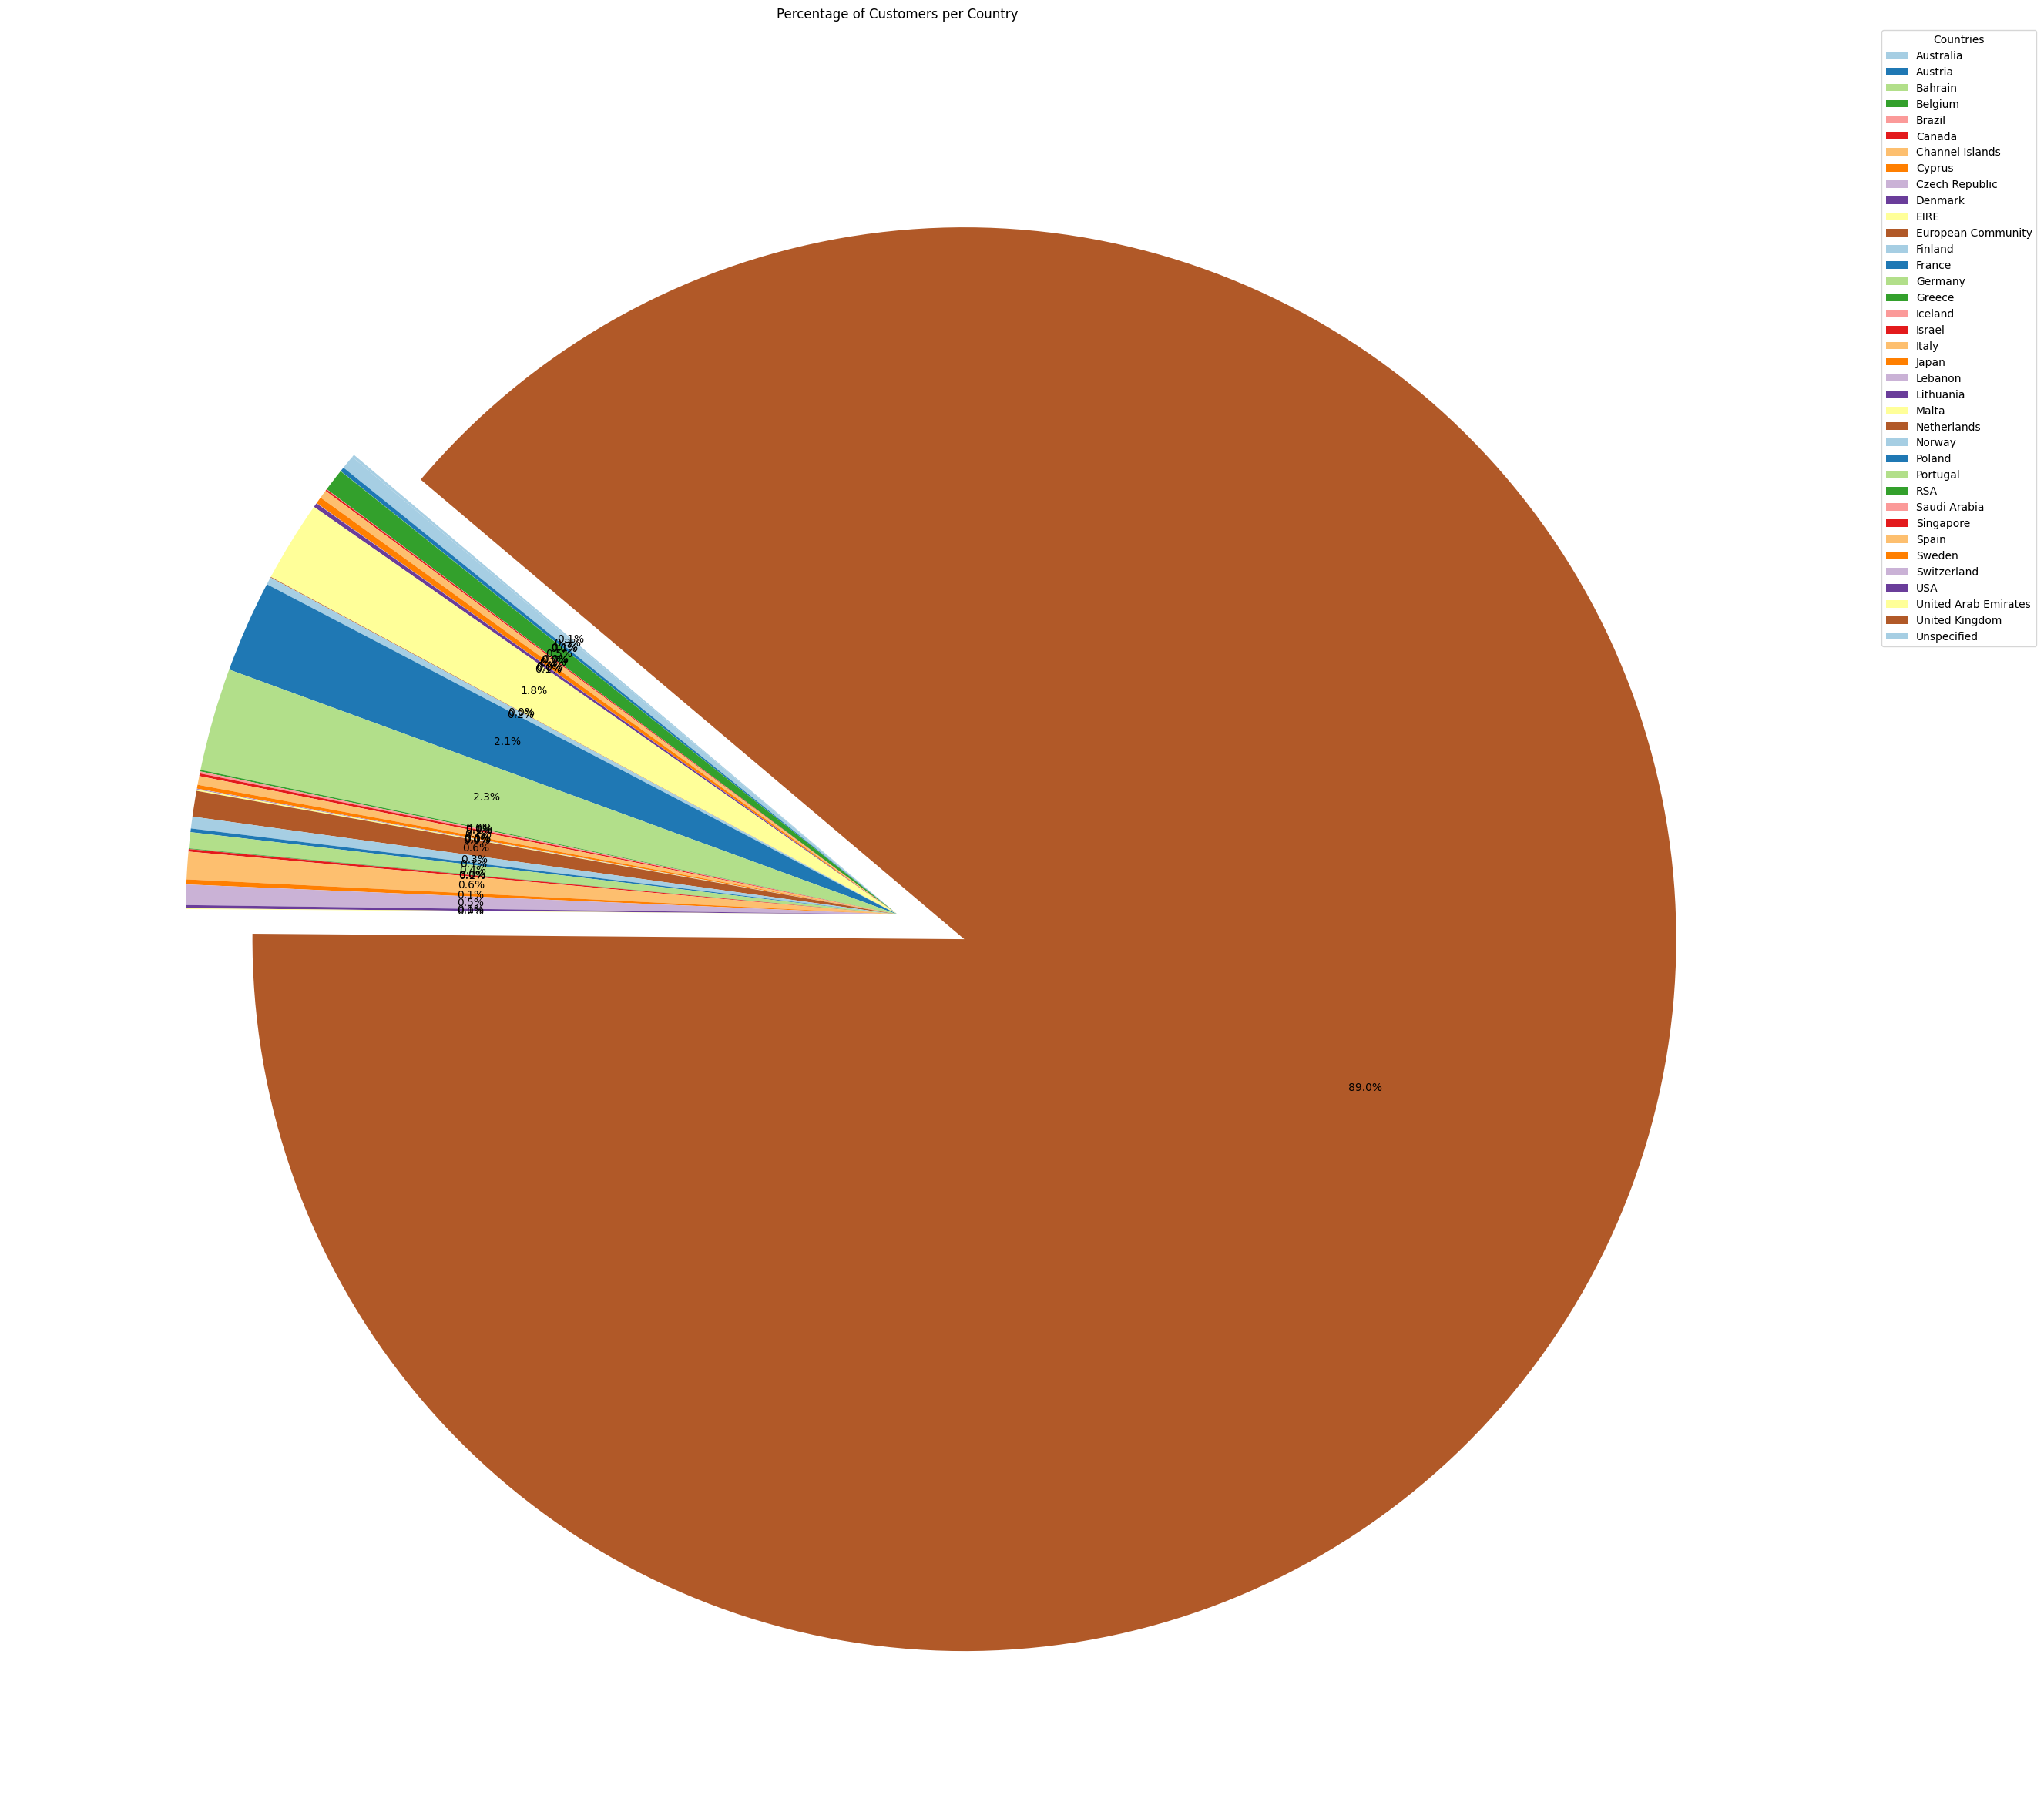

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('data.csv')

# Loại bỏ các hàng có giá trị NaN trong cột 'Description' và 'CustomerID'
df = df.dropna(subset=['Description', 'CustomerID'])

# Nhóm dữ liệu theo 'Country' và đếm số lượng
count = df.groupby('Country').size().reset_index(name='Count')

# Tạo danh sách 'explode' để tách biệt phần tử lớn nhất ra xa
explode = [0.1 if i == count['Count'].idxmax() else 0 for i in range(len(count))]

# Plotting the pie chart with explode and shadow
plt.figure(figsize=(30,30))
plt.pie(count['Count'], autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors)

# Thêm legend thay vì label trực tiếp trên các phần
plt.legend(count['Country'], title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting title
plt.title('Percentage of Customers per Country')

# Display the plot
plt.show()

Nước Anh là nước có tổng số lượt mua nhiều nhất

In [53]:
print(len(df.Description.unique()))

3896


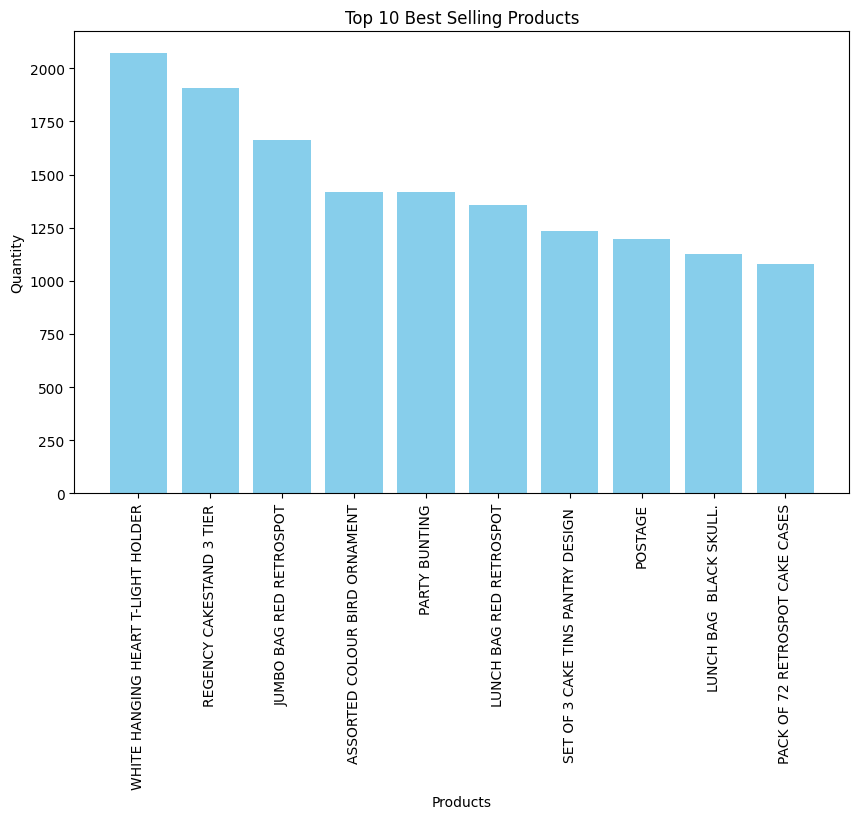

Sản phẩm bán chạy nhất trong top 10 là: WHITE HANGING HEART T-LIGHT HOLDER với 2070 lượt mua


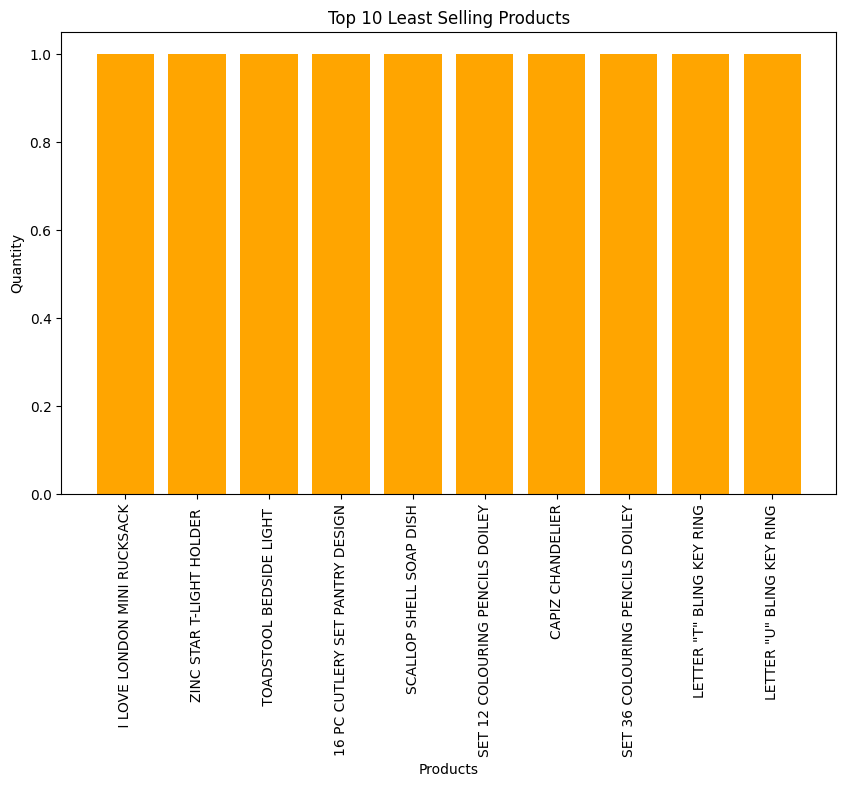

Sản phẩm bán ít nhất trong top 10 là:  I LOVE LONDON MINI RUCKSACK với 1 lượt mua


In [75]:

import matplotlib.pyplot as plt
import pandas as pd

# Nhóm dữ liệu theo mô tả sản phẩm và tính số lượng
numbers = df.groupby('Description').size().reset_index(name='numbers')

# Sắp xếp các sản phẩm theo số lượng mua giảm dần và lấy top 10 sản phẩm
top_10_products = numbers.sort_values(by='numbers', ascending=False).head(10)

# Plotting the bar chart for top 10 products
plt.figure(figsize=(10,6))  # Kích thước nhỏ hơn phù hợp với top 10
plt.bar(top_10_products['Description'], top_10_products['numbers'], color='skyblue')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Top 10 Best Selling Products')
plt.xticks(rotation=90)  # Xoay tên sản phẩm để dễ đọc

# Hiển thị biểu đồ
plt.show()

# Tìm sản phẩm bán chạy nhất trong top 10
max_value_row = top_10_products.loc[top_10_products['numbers'].idxmax()]
print(f"Sản phẩm bán chạy nhất trong top 10 là: {max_value_row['Description']} với {max_value_row['numbers']} lượt mua")
##################################################################

import matplotlib.pyplot as plt
import pandas as pd

# # Nhóm dữ liệu theo mô tả sản phẩm và tính số lượng
# numbers = df.groupby('Description').size().reset_index(name='numbers')

# Sắp xếp các sản phẩm theo số lượng mua tăng dần và lấy top 10 sản phẩm ít nhất
bottom_10_products = numbers.sort_values(by='numbers', ascending=True).head(10)

# Plotting the bar chart for bottom 10 products
plt.figure(figsize=(10,6))  # Kích thước phù hợp với top 10
plt.bar(bottom_10_products['Description'], bottom_10_products['numbers'], color='orange')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Top 10 Least Selling Products')
plt.xticks(rotation=90)  # Xoay tên sản phẩm để dễ đọc

# Hiển thị biểu đồ
plt.show()

# Tìm sản phẩm bán ít nhất trong top 10
min_value_row = bottom_10_products.loc[bottom_10_products['numbers'].idxmin()]
print(f"Sản phẩm bán ít nhất trong top 10 là: {min_value_row['Description']} với {min_value_row['numbers']} lượt mua")


Nhận thấy họ có xu hướng mua những vật dụng hằng ngày


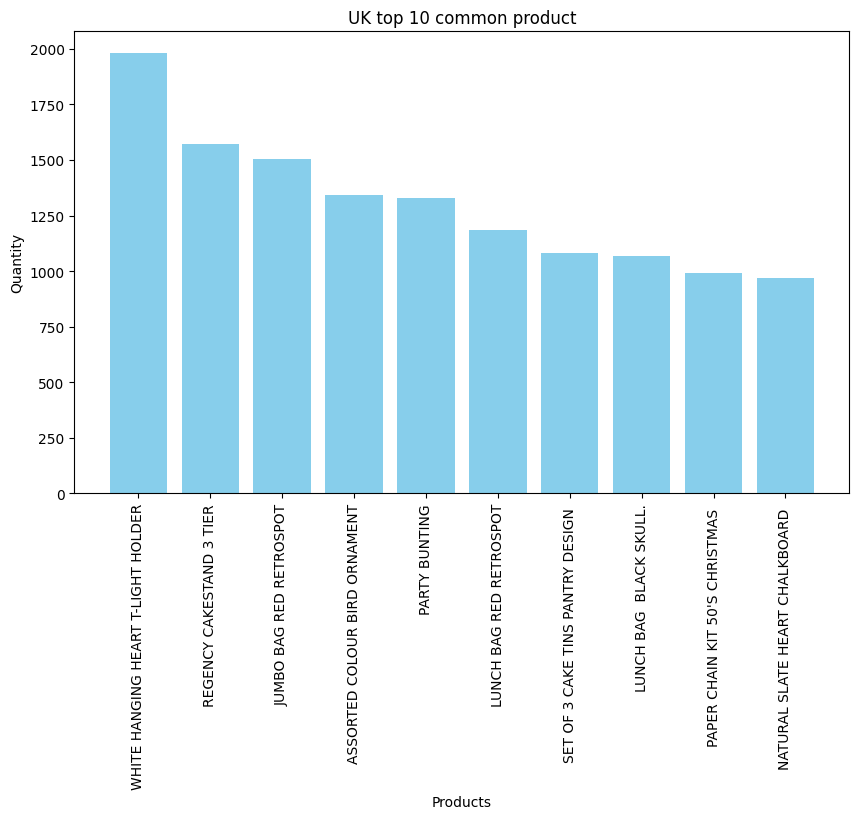

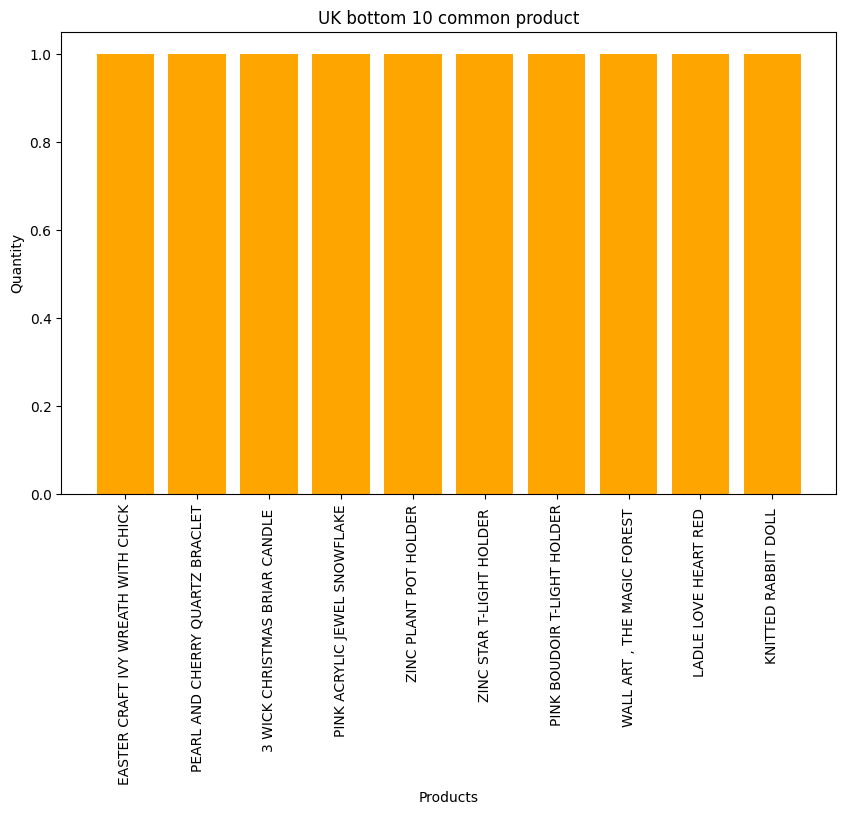

sản phẩm được mua nhiều nhất ở nước Anh là Description    WHITE HANGING HEART T-LIGHT HOLDER
quant                                        1980
Name: 3681, dtype: object
sản phẩm được mua nhiều ít ở nước Anh là Description     TOADSTOOL BEDSIDE LIGHT 
quant                                  1
Name: 9, dtype: object


In [80]:
UK=df[df['Country']=='United Kingdom']
quant=UK.groupby('Description').size().reset_index(name='quant')
top_10=quant.sort_values(by='quant', ascending=False).head(10)
bot_10=quant.sort_values(by='quant', ascending=True).head(10)
# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(top_10['Description'], top_10['quant'], color='skyblue')
# Setting labels and title
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('UK top 10 common product')
plt.xticks(rotation=90)  # Rotate country names for better readability

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(bot_10['Description'], bot_10['quant'], color='orange')
# Setting labels and title
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('UK bottom 10 common product')
plt.xticks(rotation=90)  # Rotate country names for better readability
# Display the plot
plt.show()
# Find the row with the maximum value in column
max_value_row = quant.loc[quant['quant'].idxmax()]
print(f"sản phẩm được mua nhiều nhất ở nước Anh là {max_value_row}")
min_value_row = quant.loc[quant['quant'].idxmin()]
print(f"sản phẩm được mua nhiều ít ở nước Anh là {min_value_row}")

In [56]:
#convert InvoiceDate column to readable data
# Step 1: Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Step 2: Extract relevant features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26


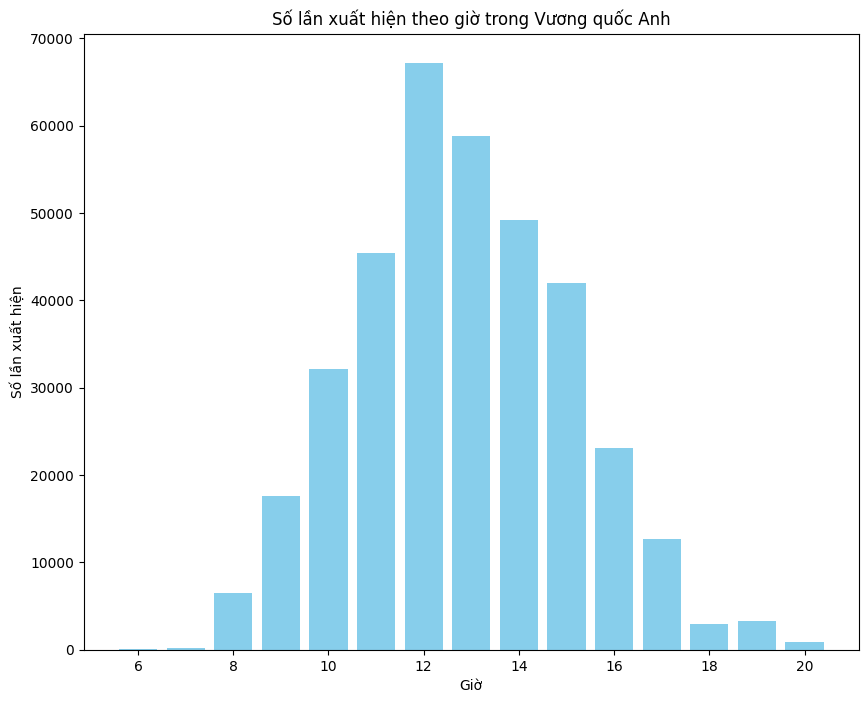

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Lọc dữ liệu cho Vương quốc Anh
UK = df[df['Country'] == 'United Kingdom']

# Nhóm dữ liệu theo giờ (không bao gồm phút)
time = UK.groupby(['Hour']).size().reset_index(name='A')

# Plotting the bar chart
plt.figure(figsize=(10,8))
plt.bar(time['Hour'], time['A'], color='skyblue')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Giờ')
plt.ylabel('Số lần xuất hiện')
plt.title('Số lần xuất hiện theo giờ trong Vương quốc Anh')
plt.xticks(rotation=0)  # Không xoay nhãn trên trục x vì chỉ có giờ

# Hiển thị biểu đồ
plt.show()


Nhận thấy nhiều người ở Anh có xu hương mua hàng vào lúc 13 h


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Filter the DataFrame for the United Kingdom
# UK = df[df['Country'] == 'United Kingdom']

# # Group by both Hour and Minute
# time = UK.groupby(['Hour', 'Minute']).size().reset_index(name='A')


# # Combine Hour and Minute into a single column for easier plotting
# time['Time'] = time['Hour'].astype(str).str.zfill(2) + ':' + time['Minute'].astype(str).str.zfill(2)

# # Find the row with the maximum value in column 'A'
# max_value_row = time.loc[time['A'].idxmax()]

# # Print the time with the maximum occurrences
# print(f"Thời gian có số lượt mua nhiều nhất: {max_value_row['Time']} với {max_value_row['A']} lượt")
# # Plotting the bar chart
# plt.figure(figsize=(100,50))
# plt.bar(time['Time'], time['A'], color='skyblue')

# # Setting labels and title
# plt.xlabel('Time (HH:MM)')
# plt.ylabel('Occurrences')
# plt.title('Occurrences by Exact Time in the UK')
# plt.xticks(rotation=90)  # Rotate time labels for better readability

# # Display the plot
# plt.show()

In [ ]:
le = LabelEncoder()
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Date,time
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,35,2010,12,1,8,26,0,8
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,35,2010,12,1,8,26,0,8
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,35,2010,12,1,8,26,0,8
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,2010,12,1,8,26,0,8
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,35,2010,12,1,8,26,0,8
